In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/ISC Case study/Data/pre_processed_dataset_balanced.csv')

In [5]:
model_path_dt = '/content/drive/MyDrive/ISC Case study/Data/dt_model.pkl'

with open(model_path_dt, 'rb') as model_file:
    dt_model = pickle.load(model_file)

In [4]:
model_path_lr = '/content/drive/MyDrive/ISC Case study/Data/logit_model.pkl'

with open(model_path_lr, 'rb') as model_file:
    logit_model = pickle.load(model_file)

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [8]:
def monte_carlo_simulation(df, model, target_column, features, n_iterations=50, test_size=0.3):
    # Store the performance metrics for each iteration
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    auc_list = []

    for i in range(n_iterations):
        # Randomly split the data into train and test sets
        X = df[features]
        y = df[target_column]

        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=test_size, random_state=i)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # for AUC

        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        # Append the metrics to the lists
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        auc_list.append(auc)

    # Calculate average and standard deviation for each metric
    results = {
        'accuracy': (np.mean(accuracy_list), np.std(accuracy_list)),
        'precision': (np.mean(precision_list), np.std(precision_list)),
        'recall': (np.mean(recall_list), np.std(recall_list)),
        'f1_score': (np.mean(f1_list), np.std(f1_list)),
        'auc': (np.mean(auc_list), np.std(auc_list)),
    }

    return results


In [10]:
features_2 = data.drop(columns=['charge_off_status'])
features_2.columns


Index(['age', 'income_level', 'fico_score', 'delinquency_status',
       'number_of_credit_applications', 'debt_to_income_ratio',
       'payment_methods_high_risk', 'max_balance', 'avg_balance_last_12months',
       'number_of_delinquent_accounts', 'number_of_defaulted_accounts',
       'new_accounts_opened_last_12months',
       'multiple_applications_short_time_period', 'unusual_submission_pattern',
       'applications_submitted_during_odd_hours', 'watchlist_blacklist_flag',
       'public_records_flag', 'account_age_days', 'credit_history_length',
       'location_encoded', 'occupation_encoded'],
      dtype='object')

In [11]:
import pandas as pd

def monte_carlo_simulation(df, model, target_column, features, n_iterations=50, test_size=0.3):
    # Store the performance metrics for each iteration
    results_list = []

    for i in range(n_iterations):
        # Randomly split the data into train and test sets
        X = df[features]
        y = df[target_column]

        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_size, random_state=i)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # for AUC

        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        # Store the metrics for this iteration
        results_list.append({
            'iteration': i+1,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc': auc
        })

    # Convert the list of results into a DataFrame
    results_df = pd.DataFrame(results_list)

    return results_df

# Define features and target
features = features_2.columns
target_column = 'charge_off_status'

# Initialize models
dt_model = dt_model
lr_model = logit_model

# Run simulation for Decision Tree
dt_results_df = monte_carlo_simulation(data, dt_model, target_column, features, n_iterations=10000)
print("Decision Tree Results DataFrame:")
print(dt_results_df.head())

# Run simulation for Logistic Regression
lr_results_df = monte_carlo_simulation(data, lr_model, target_column, features, n_iterations=10000)
print("Logistic Regression Results DataFrame:")
print(lr_results_df.head())


Decision Tree Results DataFrame:
   iteration  accuracy  precision    recall  f1_score       auc
0          1  0.801197   0.913924  0.664825  0.769723  0.801134
1          2  0.802117   0.901099  0.678933  0.774397  0.802174
2          3  0.815462   0.917174  0.693370  0.789722  0.815406
3          4  0.803037   0.895433  0.686004  0.776851  0.802983
4          5  0.811321   0.924623  0.677716  0.782147  0.811259
Logistic Regression Results DataFrame:
   iteration  accuracy  precision    recall  f1_score       auc
0          1  0.809480   0.894366  0.701657  0.786378  0.828763
1          2  0.806259   0.892689  0.696412  0.782429  0.830335
2          3  0.816843   0.900932  0.711786  0.795267  0.842172
3          4  0.802577   0.879769  0.700737  0.780113  0.829109
4          5  0.815002   0.905213  0.703499  0.791710  0.841154


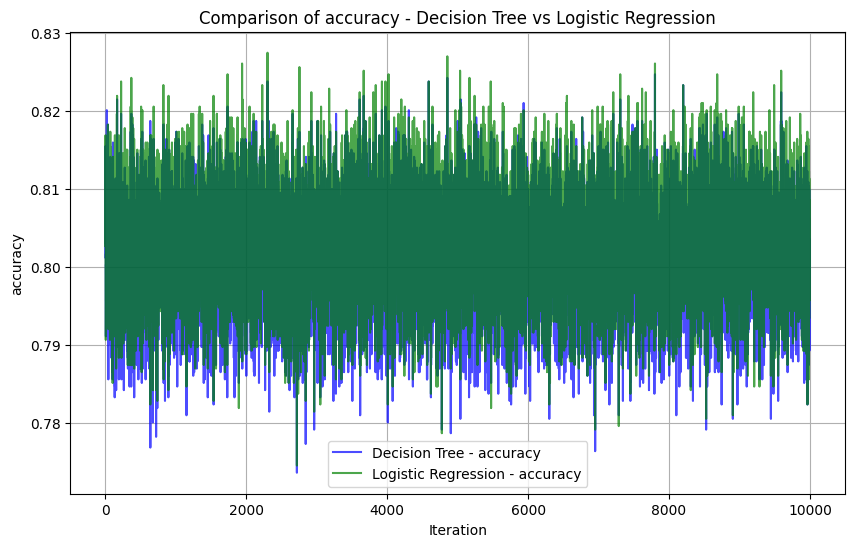

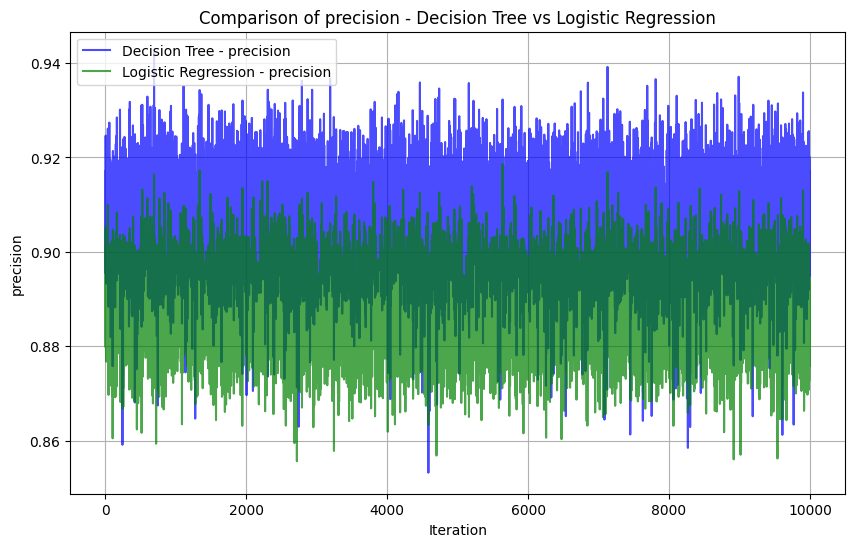

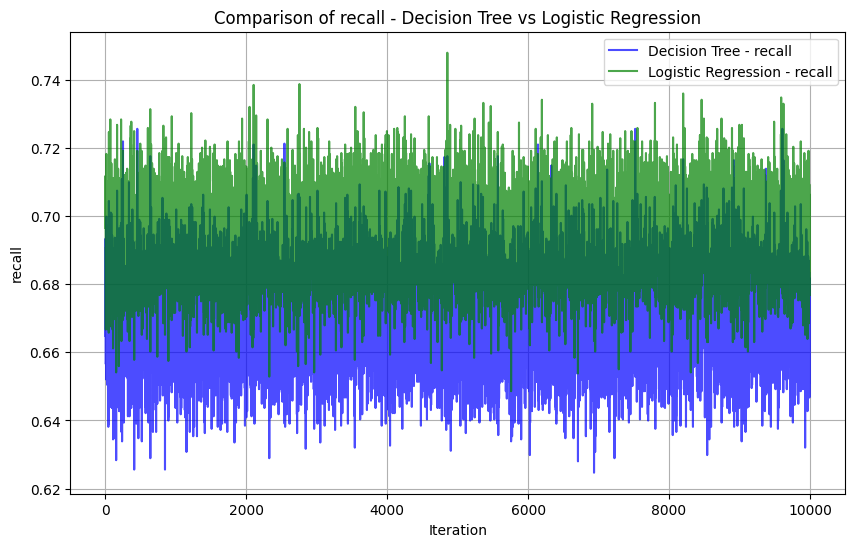

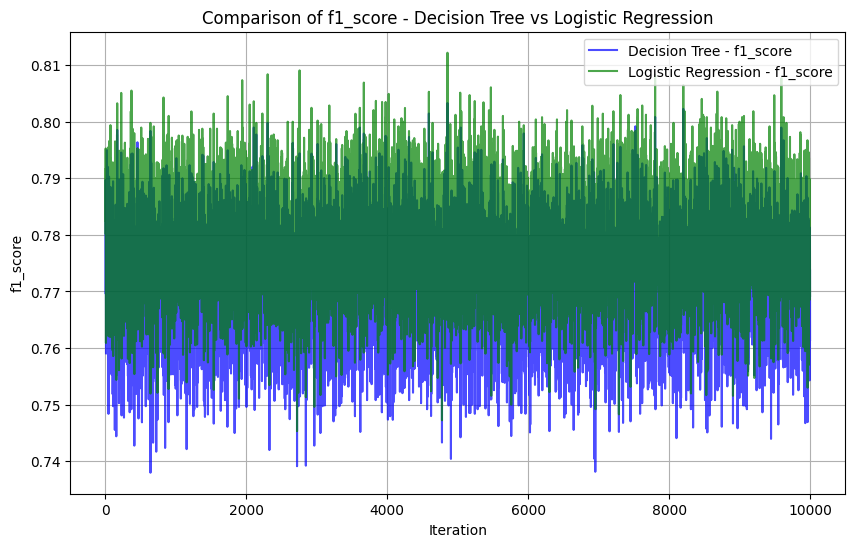

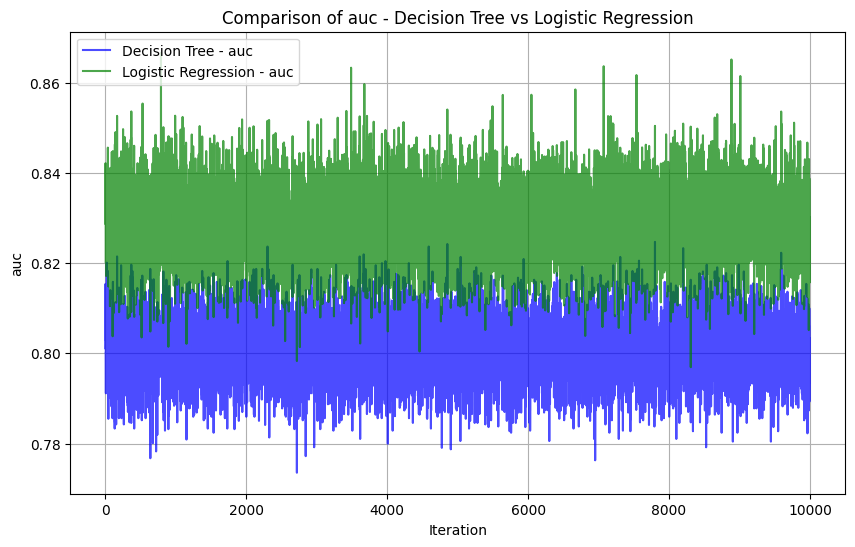

In [12]:
import matplotlib.pyplot as plt

def plot_comparison(df_dt, df_lr, metric):
    plt.figure(figsize=(10, 6))

    # Plot Decision Tree results
    plt.plot(df_dt['iteration'], df_dt[metric], label=f'Decision Tree - {metric}', color='blue', alpha=0.7)

    # Plot Logistic Regression results
    plt.plot(df_lr['iteration'], df_lr[metric], label=f'Logistic Regression - {metric}', color='green', alpha=0.7)

    plt.title(f'Comparison of {metric} - Decision Tree vs Logistic Regression')
    plt.xlabel('Iteration')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

# Metrics to visualize
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc']

# Visualize each metric
for metric in metrics:
    plot_comparison(dt_results_df, lr_results_df, metric)


Logistic Regression model performs well

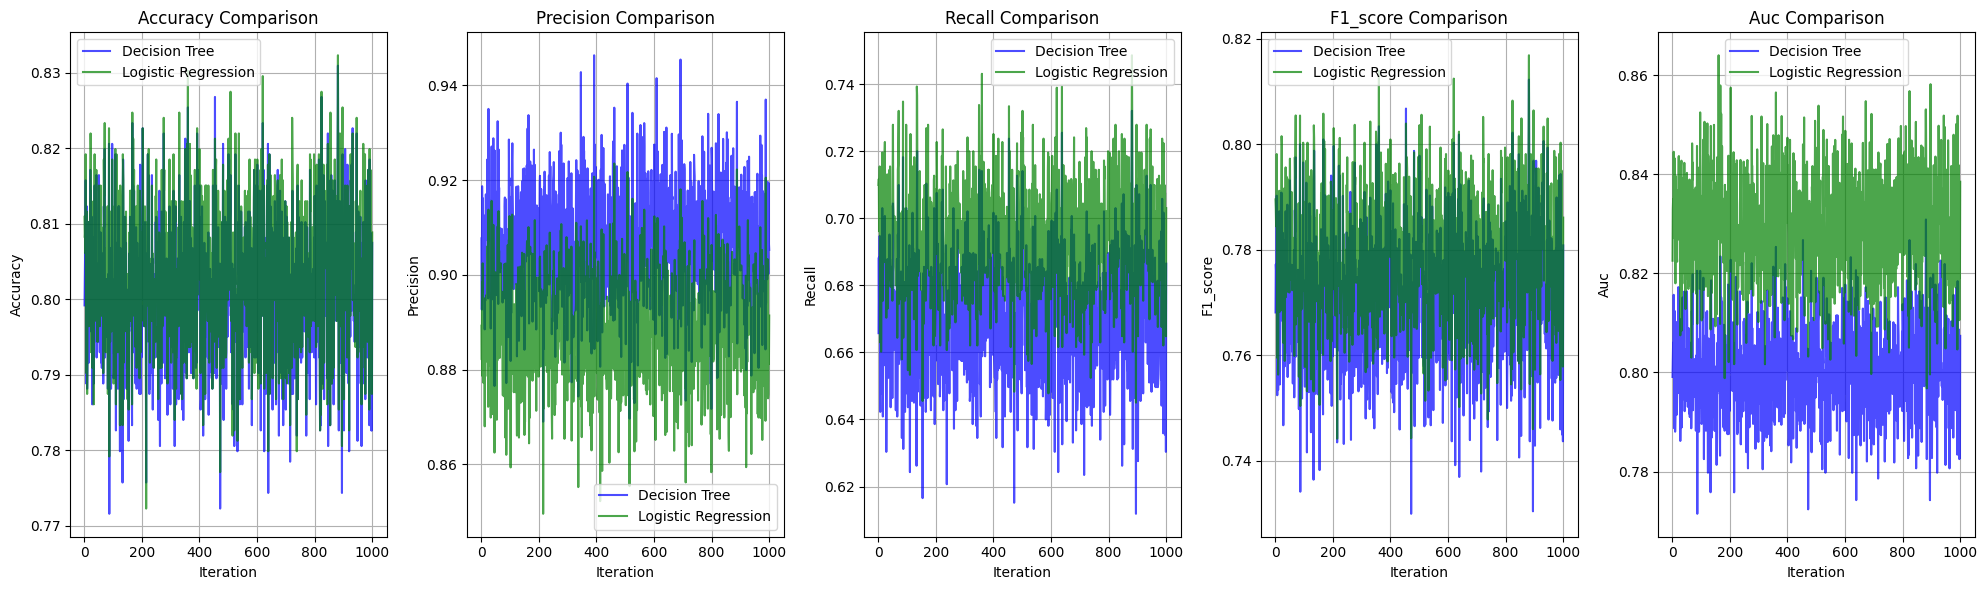

In [ ]:
import matplotlib.pyplot as plt

# Function to create a single landscape-oriented plot for all metrics
def plot_comparison_landscape(df_dt, df_lr, metrics):
    fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(20, 6))

    for ax, metric in zip(axes, metrics):
        # Plot Decision Tree results
        ax.plot(df_dt['iteration'], df_dt[metric], label='Decision Tree', color='blue', alpha=0.7)

        # Plot Logistic Regression results
        ax.plot(df_lr['iteration'], df_lr[metric], label='Logistic Regression', color='green', alpha=0.7)

        ax.set_title(f'{metric.capitalize()} Comparison')
        ax.set_xlabel('Iteration')
        ax.set_ylabel(metric.capitalize())
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# List of metrics to visualize
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc']

# Example usage with dataframes `dt_results_df` and `lr_results_df`:
plot_comparison_landscape(dt_results_df, lr_results_df, metrics)

